# " Exploratory Data Analysis and insight Generation for Targeted Automobile Marketing"

In [5]:
#import necessary libraries.
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [6]:
### Technical information about Dataset

In [7]:
df=pd.read_csv("austo_automobile+%282%29+%281%29.csv")

In [8]:
#Def function for annotation.
def annotate_plot(ax):
    """Annotate the bars of a plot with their values."""
    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2., height + 0.05, int(height),
                    ha='center', va='bottom', fontsize=10)

### 1. What is the important technical information about the dataset that a database administrator would be interested in? (Hint: Information about the size of the dataset and the nature of the variables). (2 Marks)

### Database administrator feels important to inspect the loaded data first. To inspect the data I use .info() and .head() functions to check whether the data have any discrepancies or does the data have loaded properly or not.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.1+ KB


In [17]:
### chekcing the data if it has been loaded properly or not.
df.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV


In [19]:
#The below code provide the num of rows and columns, size and the nature of the variables. 
rows,columns = df.shape
size = df.memory_usage().sum()/1024
print(f'Num of rows are {rows} and {columns} columns',
      f'\nThe size of the data is {size}','kb',
    '\n--------------------------',
'\nList of the nature with each feature provided below\n',df.dtypes)

Num of rows are 1581 and 14 columns 
The size of the data is 173.05078125 kb 
-------------------------- 
List of the nature with each feature provided below
 Age                   int64
Gender               object
Profession           object
Marital_status       object
Education            object
No_of_Dependents      int64
Personal_loan        object
House_loan           object
Partner_working      object
Salary                int64
Partner_salary      float64
Total_salary          int64
Price                 int64
Make                 object
dtype: object


### 2. Take a critical look at the data and do a preliminary analysis of the variables. Do a quality check of the data so that the variables are consistent. Are there any discrepancies present in the data? (8 Marks)

In [23]:
#By using .describe(include='all') function, I can analyise the data if any discrepancies.
df.describe(include='all')

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
count,1581.000000,1528,1581,1581,1581,1581.000000,1581,1581,1581,1581.000000,1475.000000,1581.000000,1581.000000,1581
unique,NaN,4,2,2,2,NaN,2,2,2,NaN,NaN,NaN,NaN,3
top,NaN,Male,Salaried,Married,Post Graduate,NaN,Yes,No,Yes,NaN,NaN,NaN,NaN,Sedan
freq,NaN,1199,896,1443,985,NaN,792,1054,868,NaN,NaN,NaN,NaN,702
mean,31.922201,NaN,NaN,NaN,NaN,2.457938,NaN,NaN,NaN,60392.220114,20225.559322,79625.996205,35597.722960,NaN
std,8.425978,NaN,NaN,NaN,NaN,0.943483,NaN,NaN,NaN,14674.825044,19573.149277,25545.857768,13633.636545,NaN
min,22.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,30000.000000,0.000000,30000.000000,18000.000000,NaN
25%,25.000000,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,51900.000000,0.000000,60500.000000,25000.000000,NaN
50%,29.000000,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,59500.000000,25600.000000,78000.000000,31000.000000,NaN
75%,38.000000,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,71800.000000,38300.000000,95900.000000,47000.000000,NaN


####  Post inspecting the data every column is import to make analysis, not need to drop any feature and I can see few discrepancies.

1. **<u>Age</u>** : The min age is 22 and max is 54, the elements are in int type. No missing/null values, no action needed for this feature. 
2. **<u>Gender</u>** : Gender has four unique values and missing/null values present, need to fix before the analysis.
3. **<u>Profession</u>** : Two unique elements (ie. Salaried & Business) in this feature, it is in obj type, to find the corr with other features, need to convert from categorical to numerical type by one hot encoding.
4. **<u>Marital_status</u>** : The elements in this feature are in the form of boolien/binary (ie Yes or No) and no missing/null values, to find the corr with other features, need to convert to numerical type by one hot encoding.
5. **<u>Education</u>** : Two unique elements (ie. Graduate & Post Graduate) in this feature it is in obj type, to find the corr with other features, need to convert from categorical to numerical type by one hot encoding.
6. **<u>No_of_Dependents</u>** : The elements in this feature are int type, no missing/null values. no action needed for this feature.
7. **<u>Personal_loan</U>**, **<u>House_loan</u>** & **<u>Partner_working</u>** : The elements in these features are in the form of boolien/binary (ie. Yes or No) and no missing/null values, to find the corr with other feature, need to convert to numerical type by one hot encoding.
8. **<u>Salary</u>** : The elements are in int type. No missing/null values, no action needed for this feature.
9. **<u>Partner_salary</u>** : The elements are in float type and missing/null values are present, need to fix before the analysis.
10. **<u>Total_salary</u>** & **<u>Price</u>**: The elements are in int type, no missing/null values. No action needed for this feature.
11. **<u>Make</u>** : There are three unique values(ie. SUV, Sedan, Hatchback) and no missig/null values. To find the corr with other features, need to convert to numerical type by one hot encoding.

In [27]:
#Checking the 4 unique elements and no of missing/null values in the Gender feature.
print('List of unique valuse',df['Gender'].unique(),
      '\nTotal ',df["Gender"].isnull().sum(),'null values')

List of unique valuse ['Male' 'Femal' 'Female' nan 'Femle'] 
Total  53 null values


### For the column Gender, need to replace the elements 'Femal' & 'Femle' to 'Female' and fill the missing values. Code for fixing them provided in the below cells

In [29]:
#Replacing the correct elements in the Gender feature and inspecting.
df['Gender']=df['Gender'].replace({'Femal':'Female','Femle':'Female'})
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [31]:
#Filling the nan values with the mode value from the Gender feature.
df.fillna({'Gender':df['Gender'].mode()[0]},inplace=True)
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

### Successfully sorted the column Gender, in the feature Partner_salary there are missing values. Code in the below cells for finding the no of missing/null values and filling the values.

In [35]:
#Finding the missing/null values
print('Total',df['Partner_salary'].isnull().sum(),'null values present')

Total 106 null values present


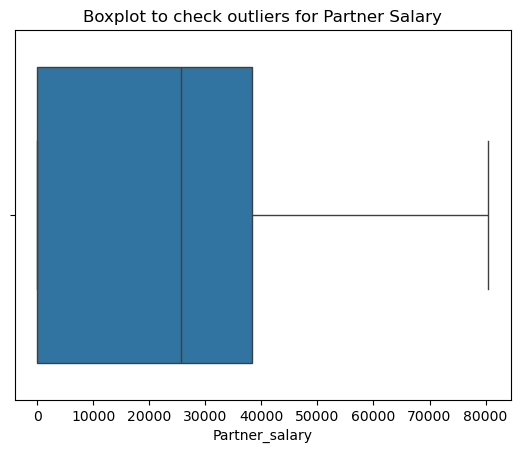

In [37]:
#Finding and fixing outliers if any, before filling the null values with mean value.
sns.boxplot(data=df,x='Partner_salary')
plt.title('Boxplot to check outliers for Partner Salary')
plt.show()

### Since there are no outliers found, I will fill the null values with mean value

In [41]:
#Code for filling null values with the mean value from the column Partner_salary.
df.fillna({'Partner_salary':df['Partner_salary'].mean()},inplace=True)
df['Partner_salary'].isnull().sum()

0

### We have cleared all the discrepancies and now its time to convert all categorical features to numerical type by using One Hot Encoding and assigning the new variable name as mldf where features in mldf will be in numerical.


In [45]:
#Duplicating the data with the new variable name mldf.
mldf=df.copy()

# Binary encoding for columns with two unique values
binary_columns = ['Gender', 'Profession', 'Marital_status', 'Education', 
                  'Personal_loan', 'House_loan', 'Partner_working']

binary_mappings = {
    'Gender': {'Male': 1, 'Female': 0},
    'Profession': {'Salaried': 1, 'Business': 0},
    'Marital_status': {'Married': 1, 'Single': 0},
    'Education': {'Post Graduate': 0,'Graduate': 1},
    'Personal_loan': {'Yes': 1, 'No': 0},
    'House_loan': {'Yes': 1, 'No': 0},
    'Partner_working': {'Yes': 1, 'No': 0},
}

for col, mapping in binary_mappings.items():
    mldf[col] = mldf[col].map(mapping)

# One-hot encoding for columns with more than two unique values
mldf = pd.get_dummies(mldf, columns=['Make'], drop_first=True)

In [47]:
#inspecting whether the convertion from categorial to numarical done properly.
mldf.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make_SUV,Make_Sedan
0,53,1,0,1,0,4,0,0,1,99300,70700.0,170000,61000,True,False
1,53,0,1,1,0,4,1,0,1,95500,70300.0,165800,61000,True,False
2,53,0,1,1,0,3,0,0,1,97300,60700.0,158000,57000,True,False
3,53,0,1,1,1,2,1,0,1,72500,70300.0,142800,61000,True,False
4,53,1,1,1,0,3,0,0,1,79700,60200.0,139900,57000,True,False


### Now the data is ready to do analysis.

### 3. Explore all the features of the data separately by using appropriate visualizations and draw insights that can be utilized by the business. (8 Marks)

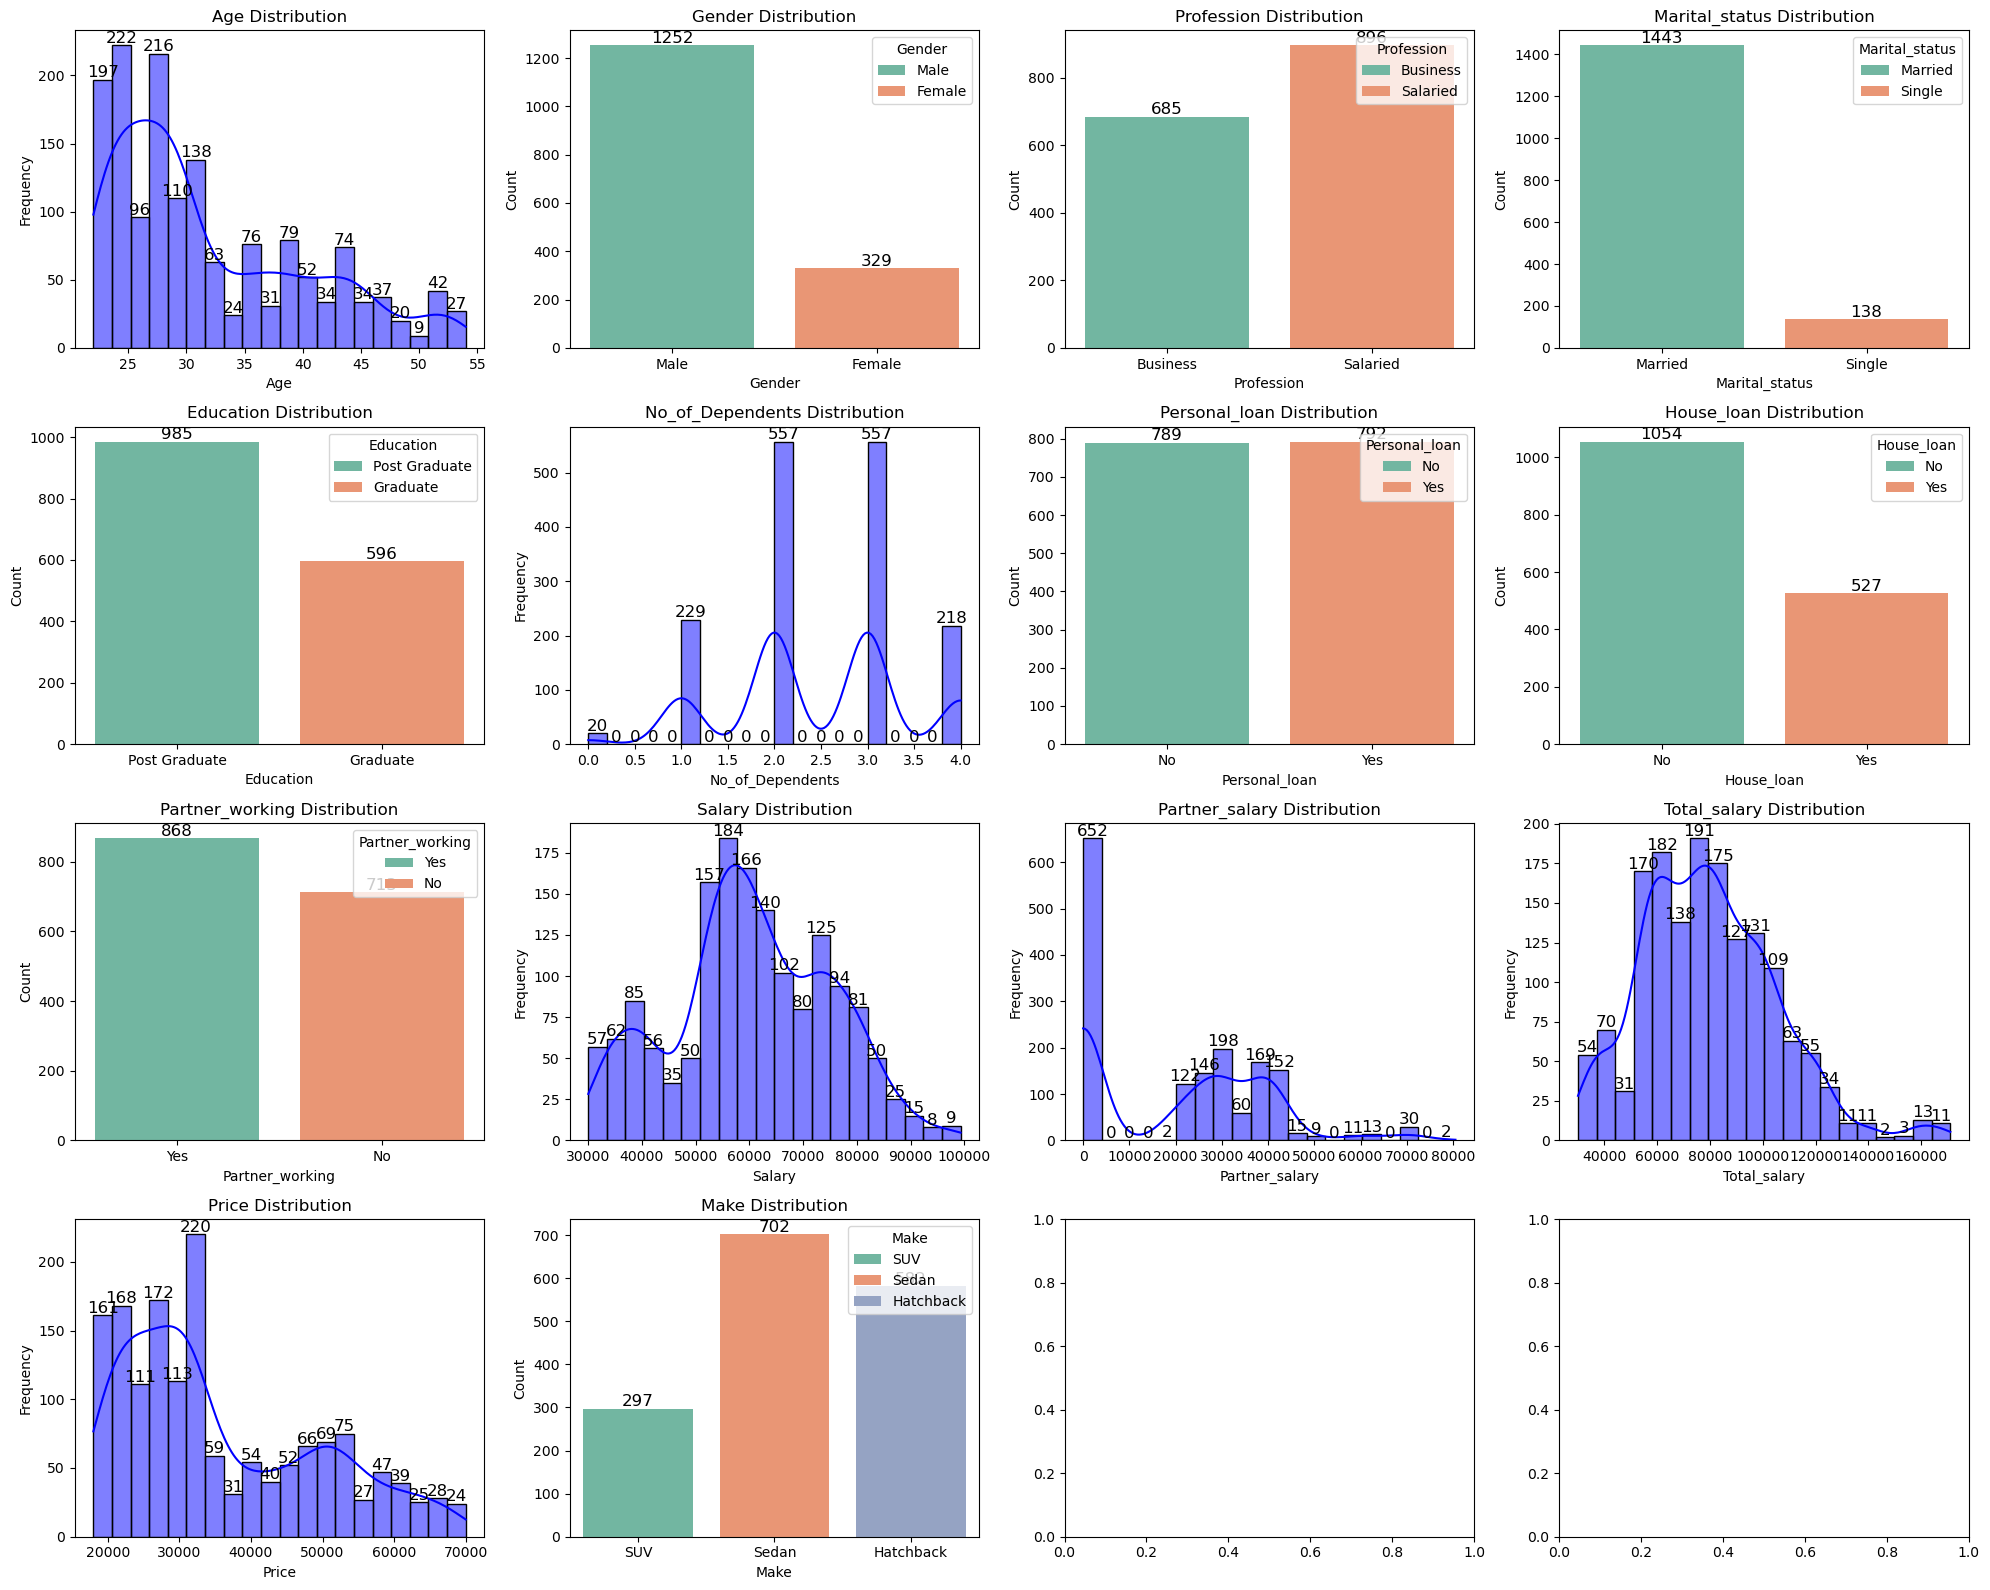

In [53]:
# Set up the figure with subplots (adjust the number of rows and columns as needed)
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 16))  # 4x4 grid for 16 plots, adjust as needed
axes = axes.flatten()  # Flatten the axes array for easy iteration

# List of columns in your dataset
columns = ['Age', 'Gender', 'Profession', 'Marital_status', 'Education',
           'No_of_Dependents', 'Personal_loan', 'House_loan', 'Partner_working',
           'Salary', 'Partner_salary', 'Total_salary', 'Price', 'Make']

# Loop over columns and plot each feature in the corresponding subplot
for i, col in enumerate(columns):
    ax = axes[i]
    
    if df[col].dtype == 'object':  # Categorical data (e.g., Gender, Education)
        sns.countplot(data=df, x=col, ax=ax, palette='Set2', hue=col, legend=False)
        ax.set_title(f'{col} Distribution')
        ax.set_xlabel(col)
        ax.set_ylabel('Count')

        # Manually add legend based on the unique values in the column
        unique_values = df[col].dropna().unique()
        ax.legend(title=col, labels=unique_values, loc='upper right')

        # Annotate the bars with the count value
        for p in ax.patches:
            ax.annotate(f'{p.get_height():.0f}',  # Display the count on top of the bar
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='center', fontsize=12, color='black', 
                        xytext=(0, 5), textcoords='offset points')

    else:  # Numerical data (e.g., Age, Salary)
        sns.histplot(df[col], kde=True, ax=ax, color='blue', bins=20)
        ax.set_title(f'{col} Distribution')
        ax.set_xlabel(col)
        ax.set_ylabel('Frequency')

        # Annotate the histogram with the count values
        for patch in ax.patches:
            ax.annotate(f'{patch.get_height():.0f}',  # Display the count on top of the bar
                        (patch.get_x() + patch.get_width() / 2., patch.get_height()), 
                        ha='center', va='center', fontsize=12, color='black', 
                        xytext=(0, 5), textcoords='offset points')

# Adjust layout to make sure everything fits and labels are readable
plt.tight_layout()
plt.show()

### 4. Understanding the relationships among the variables in the dataset is crucial for every analytical project. Perform analysis on the data fields to gain deeper insights. Comment on your understanding of the data. (8 Marks)

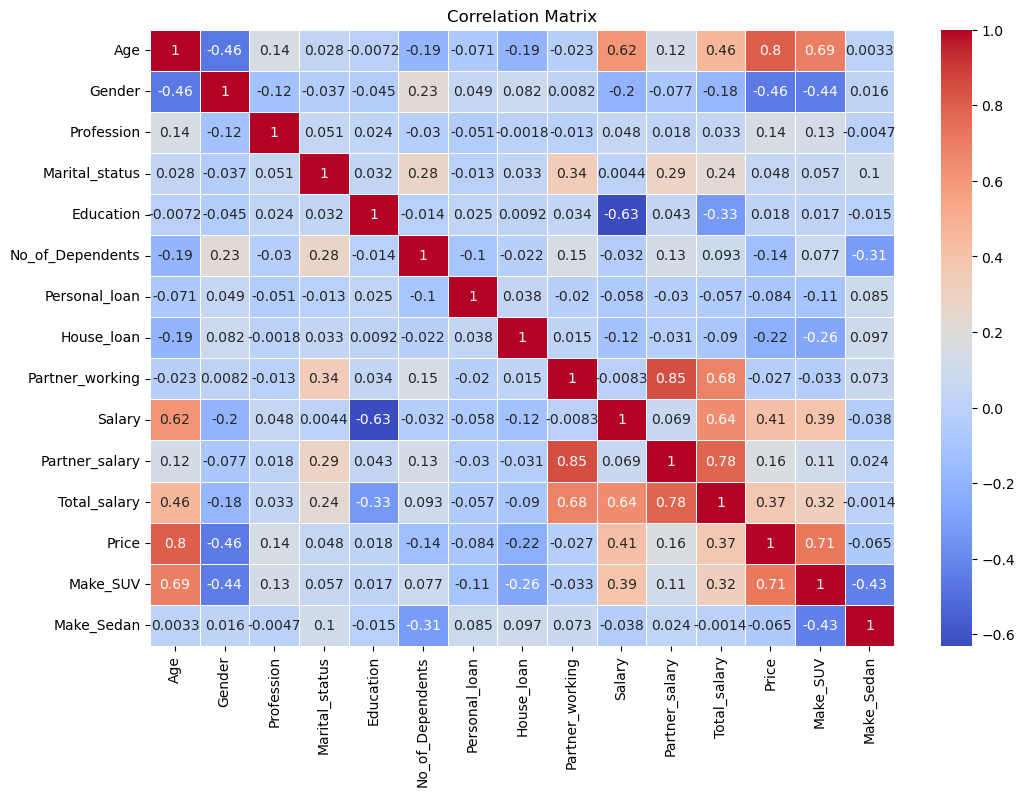

In [57]:
corr=mldf.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

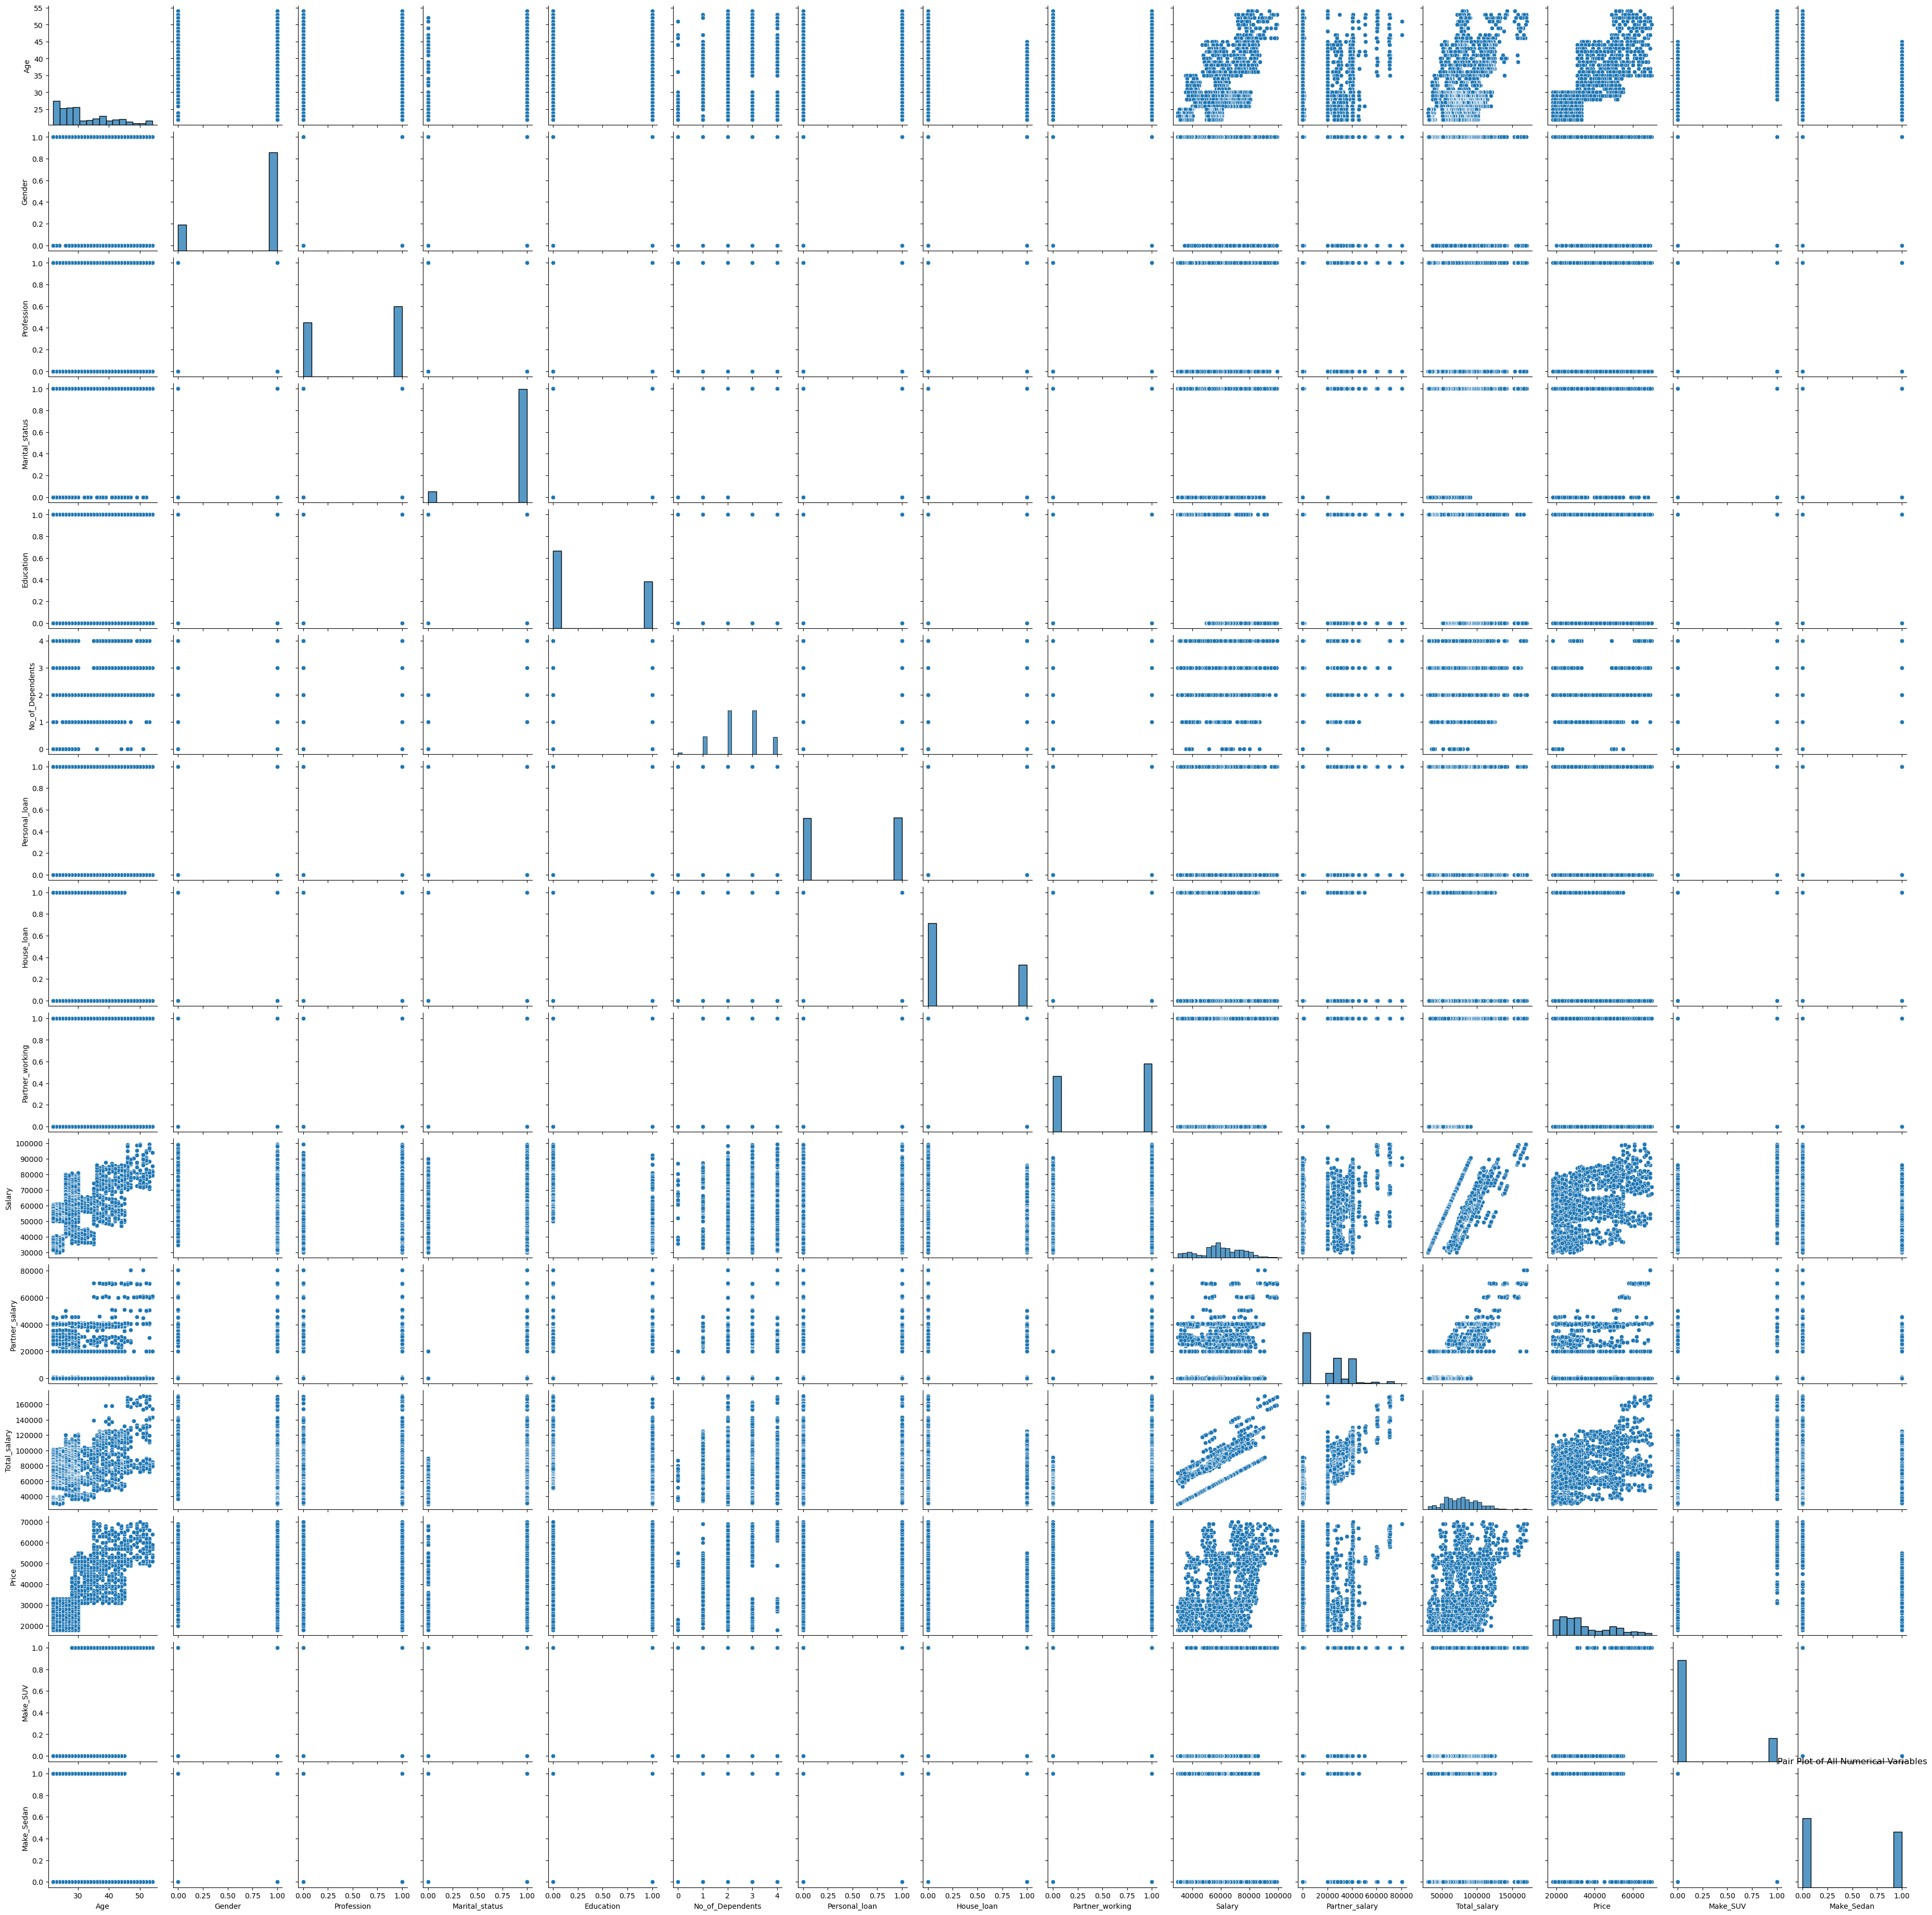

In [72]:
sns.pairplot(mldf)
plt.title("Pair Plot of All Numerical Variables")
plt.show()

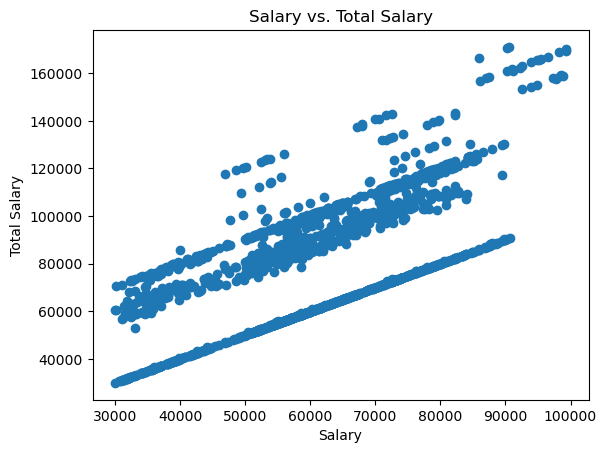

In [66]:
plt.scatter(mldf['Salary'], mldf['Total_salary'])
plt.title("Salary vs. Total Salary")
plt.xlabel("Salary")
plt.ylabel("Total Salary")
plt.show()

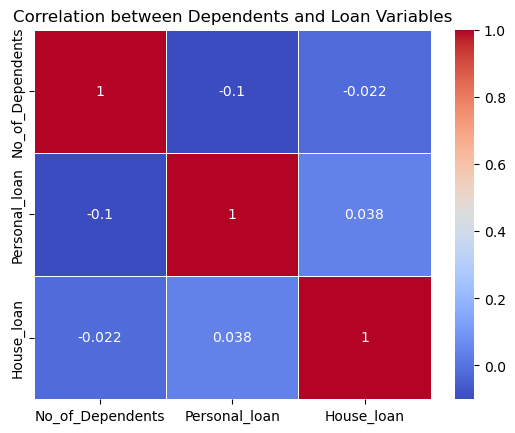

In [62]:
sns.heatmap(mldf[['No_of_Dependents', 'Personal_loan', 'House_loan']].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation between Dependents and Loan Variables")
plt.show()

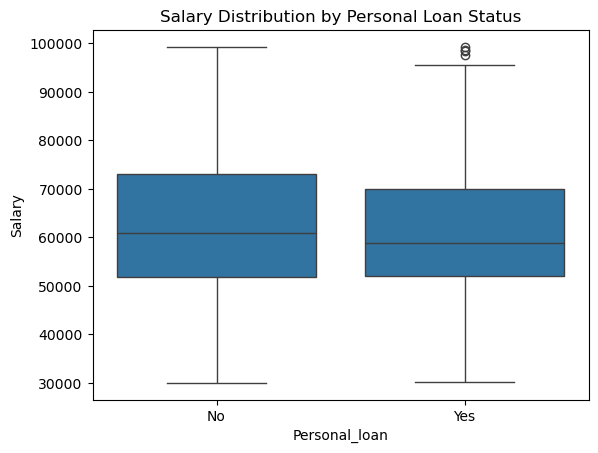

In [63]:
sns.boxplot(x='Personal_loan', y='Salary', data=df)
plt.title("Salary Distribution by Personal Loan Status")
plt.show()

In [64]:
X = df['Salary']
y = df['Total_salary']

# Add a constant term for the intercept
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Total_salary   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     1105.
Date:                Tue, 11 Mar 2025   Prob (F-statistic):          4.49e-184
Time:                        20:49:39   Log-Likelihood:                -17868.
No. Observations:                1581   AIC:                         3.574e+04
Df Residuals:                    1579   BIC:                         3.575e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.218e+04   2088.449      5.831      0.0

### 5. Employees working on the existing marketing campaign have made the following remarks. Based on the data and your analysis state whether you agree or disagree with their observations. Justify your answer Based on the data available. (6 Marks)
E1) Steve Roger says “Men prefer SUV by a large margin, compared to the women”.
E2) Ned Stark believes that a salaried person is more likely to buy a Sedan.
E3) Sheldon Cooper does not believe any of them; he claims that a salaried male is an easier target for a SUV sale over a Sedan Sale.

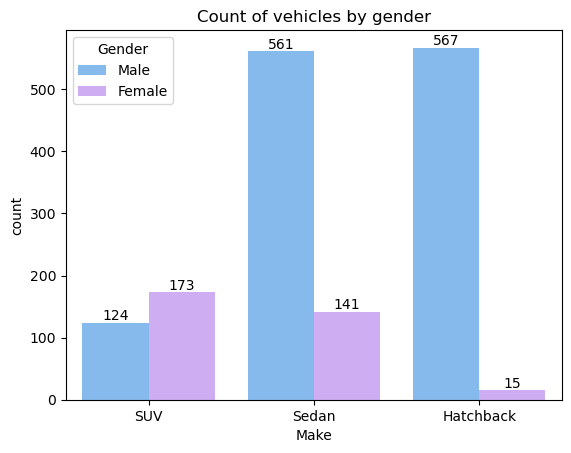

Number of SUV bought by Male Gender
Female    173
Male      124
dtype: int64


In [78]:
#E1) Steve Roger says “Men prefer SUV by a large margin, compared to the women”.
e1ax=sns.countplot(data=df,x='Make',hue='Gender',palette={'Male': '#75bbfd', 'Female': '#cea2fd'},legend=True)
annotate_plot(e1ax)
plt.title('Count of vehicles by gender')
plt.show()

print('Number of SUV bought by Male',df[df['Make']=='SUV'].groupby('Gender').size())

### Steve Roger is correct with his analysis, as we can see the countplot chart and the validation above as a proof, male prefer SUV more compring to female.

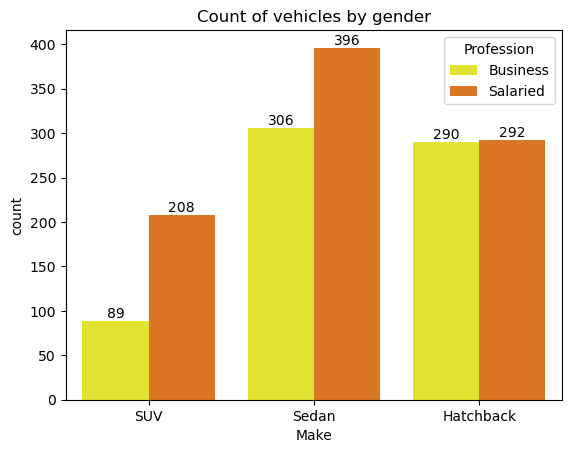

Number of Sedan bought Preofession Profession
Business    306
Salaried    396
dtype: int64


In [82]:
#E2) Ned Stark believes that a salaried person is more likely to buy a Sedan.
e2ax=sns.countplot(data=df,x='Make',hue='Profession',legend=True,palette={'Salaried':'#f97306','Business':'#ffff14'})
annotate_plot(e2ax)
plt.title('Count of vehicles by gender')
plt.show()

print('Number of Sedan bought Preofession',df[df['Make']=='Sedan'].groupby('Profession').size())

### Ned stark's belief was right, salaried persons are the more buyers of Sedan comparing to businesses persons

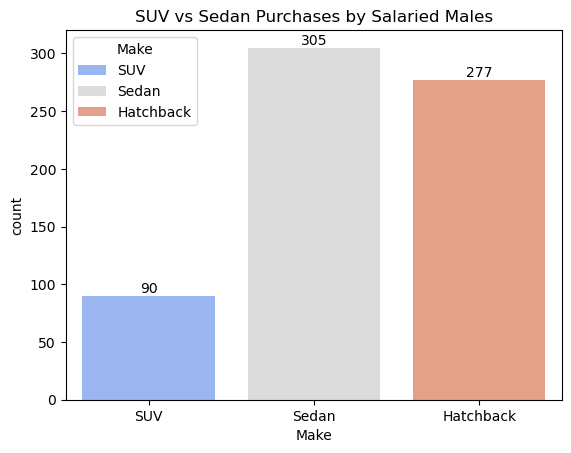

Total number of SUV bought by salaried male are 90


In [86]:
#E3) Sheldon Cooper does not believe any of them; he claims that a salaried male is an easier target for a SUV sale 
#over a Sedan Sale.
filtered_df = df[(df['Gender'] == 'Male') & (df['Profession'] == 'Salaried')]
e3ax=sns.countplot(data=filtered_df, x='Make', hue='Make', palette='coolwarm',legend=True)
annotate_plot(e3ax)
plt.title('SUV vs Sedan Purchases by Salaried Males')
plt.show()

filtered = df[(df['Make'] == 'SUV') & (df['Gender'] == 'Male') & (df['Profession'] == 'Salaried')]
print('Total number of SUV bought by salaried male are',len(filtered))

### Sheldon Cooper was wrong with his belief, salaried male are not easy target for SUV sale. As we can see the chat clearly, salaried persons are easy target for Sedan.

### 6. From the given data, comment on the amount spent on purchasing automobiles across the following categories. Comment on how a Business can utilize the results from this exercise. Give justification along with presenting metrics/charts used for arriving at the conclusions. (4 Marks)
F1) Gender
F2) Personal_loan

In [94]:
#F1) Group by Gender
gender_analysis = df.groupby('Gender')['Price'].sum().reset_index()
print('The below table shows the total amount spent on purchasing auto-mobiles by Gender\n')
gender_analysis

The below table shows the total amount spent on purchasing auto-mobiles by Gender



,Gender,Price
0,Female,15695000
1,Male,40585000


In [96]:
# F2) Group by Personal Loan
loan_analysis = df.groupby(['Personal_loan','Gender'])['Price'].sum().reset_index()
print('The total amount spent to purchase auto-moblie by having their personal loan')
loan_analysis


The total amount spent to purchase auto-moblie by having their personal loan


,Personal_loan,Gender,Price
0,No,Female,8762000
1,No,Male,20228000
2,Yes,Female,6933000
3,Yes,Male,20357000


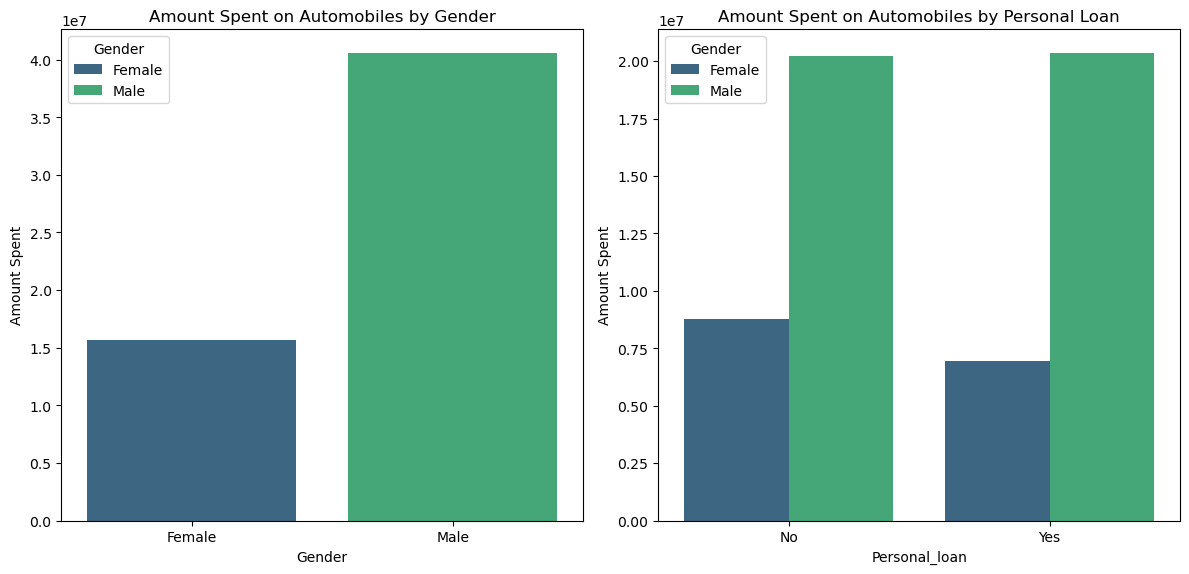

In [98]:
# Visualization
plt.figure(figsize=(12, 6))

# Gender Analysis Chart
plt.subplot(1, 2, 1)
sns.barplot(data=gender_analysis, x='Gender', y='Price',hue='Gender', palette='viridis',legend=True)
plt.title('Amount Spent on Automobiles by Gender')
plt.ylabel('Amount Spent')

# Loan Analysis Chart
plt.subplot(1, 2, 2)
sns.barplot(data=loan_analysis, x='Personal_loan', y='Price',hue='Gender', palette='viridis',legend=True)
plt.title('Amount Spent on Automobiles by Personal Loan')
plt.ylabel('Amount Spent')

plt.tight_layout()
plt.show()

### 7. From the current data set comment if having a working partner leads to purchase of a higher priced car. (2 Marks)

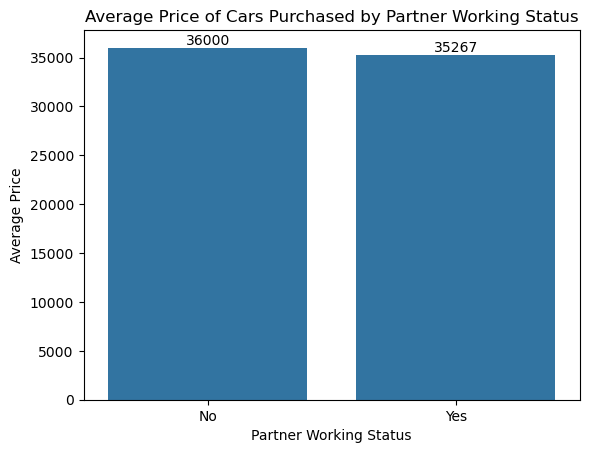

,Partner_working,mean,count
0,No,36000.000000,713
1,Yes,35267.281106,868


In [103]:
# Grouping by 'Partner_working' and analyzing car prices
partner_analysis = df.groupby('Partner_working')['Price'].agg(['mean', 'count']).reset_index()

# Visualization
working_partnerax=sns.barplot(data=partner_analysis, x='Partner_working', y='mean',legend=True)
annotate_plot(working_partnerax)
plt.title('Average Price of Cars Purchased by Partner Working Status')
plt.ylabel('Average Price')
plt.xlabel('Partner Working Status')
plt.show()

# Metrics
partner_analysis

### After analysing having a working partner is not leading to purchase of a higher priced car.

### 8. The main objective of this analysis is to devise an improved marketing strategy to send targeted information to different groups of potential buyers present in the data. For the current analysis use Gender and Marital_status - fields to arrive at groups with similar purchase history. (6 Marks)


In [112]:
# Grouping and Aggregating
grouped_data = df.groupby(['Gender', 'Marital_status'])['Price'].agg(['mean', 'sum', 'count']).reset_index()

# Renaming columns for clarity
grouped_data.columns = ['Gender', 'Marital_status', 'Average_Price', 'Total_Spending', 'Purchase_Count']
grouped_data

,Gender,Marital_status,Average_Price,Total_Spending,Purchase_Count
0,Female,Married,47918.566775,14711000,307
1,Female,Single,44727.272727,984000,22
2,Male,Married,32525.528169,36949000,1136
3,Male,Single,31344.827586,3636000,116


<u>Metrics</u>
1. Average Price: The average price of cars purchased by each group.
2. Total Spending: Total spending on cars by each group.
3. Purchase Count: The number of purchases made by each group.

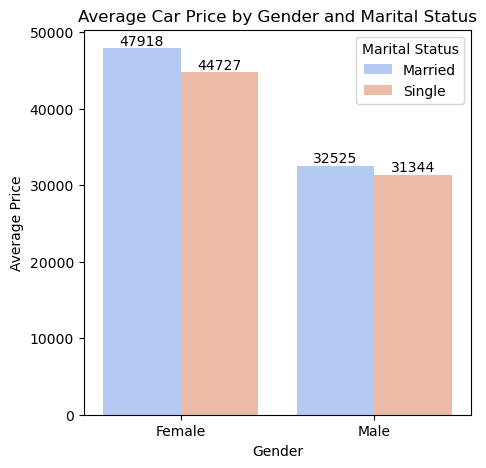

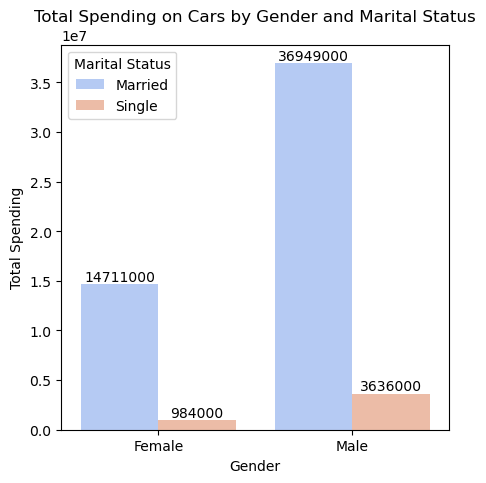

In [117]:
# Visualization: Average Price by Group
plt.figure(figsize=(5, 5))
ax=sns.barplot(data=grouped_data, x='Gender', y='Average_Price', hue='Marital_status', palette='coolwarm')
annotate_plot(ax)
plt.title('Average Car Price by Gender and Marital Status')
plt.ylabel('Average Price')
plt.xlabel('Gender')
plt.legend(title='Marital Status')
plt.show()

# Visualization: Total Spending by Group
plt.figure(figsize=(5, 5))
axx=sns.barplot(data=grouped_data, x='Gender', y='Total_Spending', hue='Marital_status', palette='coolwarm')
annotate_plot(axx)
plt.title('Total Spending on Cars by Gender and Marital Status')
plt.ylabel('Total Spending')
plt.xlabel('Gender')
plt.legend(title='Marital Status')
plt.show()

#### Married Females are interested to purchase the high valued car. As per the whole data, married male all the most buyers.

###  9. Framing An Analytics Problem Analyse the dataset and list down the top 5 important variables, along with the business justifications. (10 Marks)

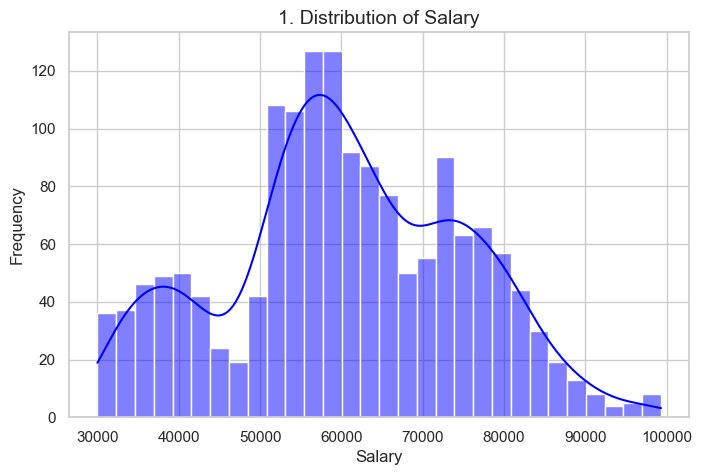

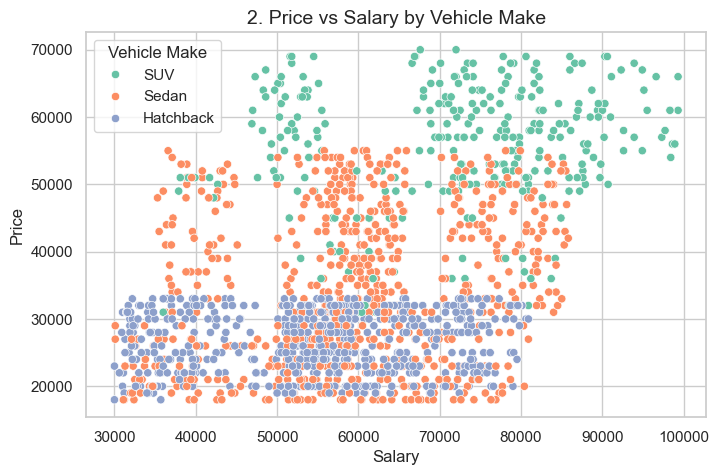

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10448\3825477211.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='No_of_Dependents', y='Total_salary', data=df, palette='coolwarm')


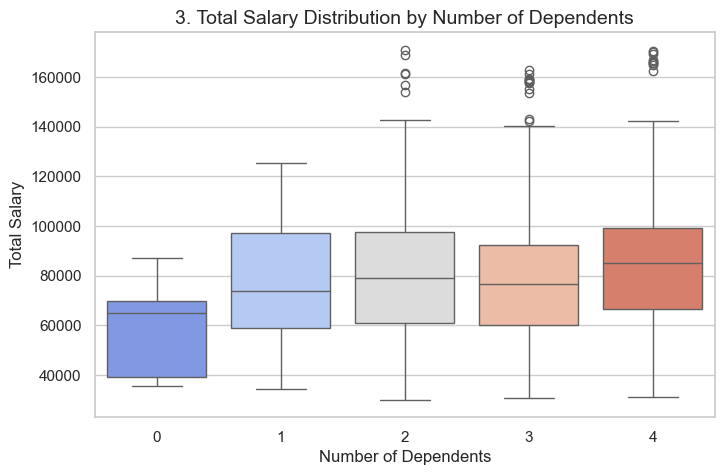

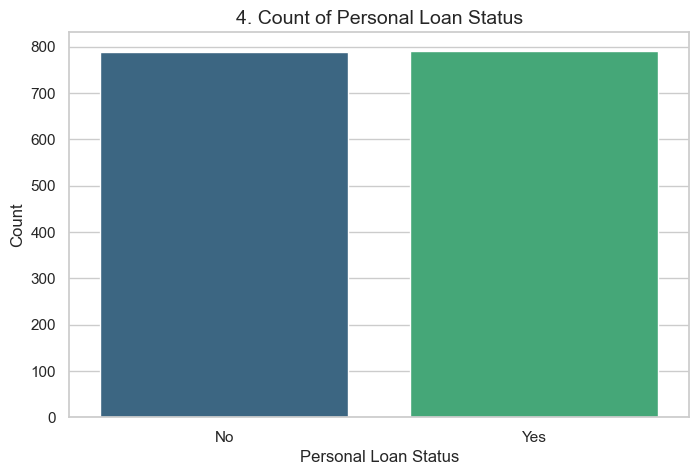

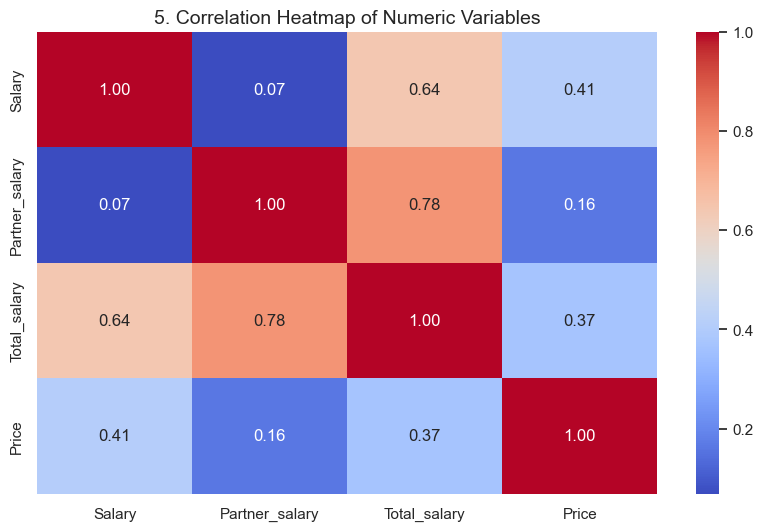

In [128]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# 1. Distribution of Salary
plt.figure(figsize=(8, 5))
sns.histplot(df['Salary'], kde=True, color='blue', bins=30)
plt.title("1. Distribution of Salary", fontsize=14)
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show()

# 2. Price vs Salary
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Salary', y='Price', hue='Make', data=df, palette='Set2')
plt.title("2. Price vs Salary by Vehicle Make", fontsize=14)
plt.xlabel("Salary")
plt.ylabel("Price")
plt.legend(title="Vehicle Make")
plt.show()

# 3. Total Salary Distribution by Number of Dependents
plt.figure(figsize=(8, 5))
sns.boxplot(x='No_of_Dependents', y='Total_salary', data=df, palette='coolwarm')
plt.title("3. Total Salary Distribution by Number of Dependents", fontsize=14)
plt.xlabel("Number of Dependents")
plt.ylabel("Total Salary")
plt.show()

# 4. Count of Personal Loan Status
plt.figure(figsize=(8, 5))
sns.countplot(x='Personal_loan', data=df,hue='Personal_loan', palette='viridis')
plt.title("4. Count of Personal Loan Status", fontsize=14)
plt.xlabel("Personal Loan Status")
plt.ylabel("Count")
plt.show()

# 5. Correlation Heatmap of Numeric Variables
plt.figure(figsize=(10, 6))
corr = df[['Salary', 'Partner_salary', 'Total_salary', 'Price']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("5. Correlation Heatmap of Numeric Variables", fontsize=14)
plt.show()


#### 1.Salary Distribution:  The histogram shows the spread and skewness of salaries in the dataset. This helps identify income trends and outliers.
#### 2.Price vs. Salary by Vehicle Make:  A scatterplot displays the relationship between customer salaries and the price of vehicles they purchase, differentiated by vehicle make.
#### 3.Total Salary vs. Number of Dependents:  The boxplot reveals how total salary varies with the number of dependents, showing the impact of family size on household income.
#### 4.Personal Loan Status Count:  The bar chart highlights the distribution of personal loan holders, useful for understanding financial product engagement.
####  5.Correlation Heatmap:  This heatmap illustrates the relationships between numeric variables like Salary, Partner Salary, Total Salary, and Price, indicating potential dependencies.

#### 10. Quality of Business Report (Please refer to the Evaluation Guidelines for Business report checklist. Marks in this criteria are at the moderator's discretion). (6 Marks)


# Business Report: Customer Segmentation and Insights


---

# 1. Introduction

  - **Objective**: Provide a logical guidance to address customer segmentation for better marketing and product positioning. 
- **Problem Statement**: Analyze customer demographics and purchasing patterns to identify critical factors influencing vehicle purchases. 
- **Target Audience**: Business stakeholders and subject matter experts.
- **Approach**: Data-driven analysis focusing on segmentation, exploratory insights, and actionable recommendations.

---

## 2. Data Description
- **Context**:
  - Dataset contains customer demographics, financial details, and vehicle-related attributes.
  - Relevant for understanding income-based affordability and preferences.
- **Variables**:
  - **Salary**: Customer’s monthly income.
  - **Partner Salary**: Additional household income.
  - **Total Salary**: Combined household income.
  - **Price**: Vehicle price paid by the customer.
  - **No_of_Dependents**: Number of dependents supported by the customer.
  - **Personal Loan**: Binary indicator of loan usage.
- **Remarks**:
  - Unusual Variables: Total Salary is derived but crucial for understanding combined purchasing power.
  - Problem Constraints: Data lacks geographic segmentation or behavioral variables.

---

## 3. Analysis Process
1. **Exploratory Data Analysis (EDA)**:
                                                  - Visualized salary distributions and its impact on vehicle price preferences.
   - Highlighted relationships between income, dependents, and purchasing patterns.
2. **Clustering Analysis**:
   - Used KMeans to segment customers into three distinct groups.
   - Segmentation criteria: Salary, Total Salary, and Price.
   - Derived actionable insights for each cluster.

---

## 4. Insights and Observations
- **Key Variables**:
  - Salary and Total Salary are strong indicators of purchasing power.
  - Price reflects customer affordability and preferences.
- **Cluster Insights**:
  - **Cluster 0**: Low-income group, budget-conscious buyers.
  - **Cluster 1**: Mid-income group, balanced affordability seekers.
  - **Cluster 2**: High-income group, luxury product buyers.
- **Visual Representations**:
  - Annotated charts show the distribution and relationships of key variables.
  - Heatmaps and scatterplots highlight correlations and segment distinctions.

---

## 5. Recommendations
- **Marketing Strategies**:
  - Promote affordable financing options for low-income clusters.
  - Emphasize value-for-money features for mid-income groups.
  - Highlight premium features for high-income customers.
- **Product Development**:
  - Develop entry-level, mid-range, and premium vehicle lines tailored to cluster preferences.
- **Further Steps**:
  - Incorporate geographic and behavioral data for deeper segmentation.

---

## 6. Conclusion
- Summarized findings and their relevance to business objectives.
- Highlighted the importance of a data-driven approach for customer targeting.

---

## 7. References
- Mentioned sources for visual inspiration and text references.
- Provided links to supplementary data analysis in Jupyter Notebook.

---

## Checklist for Evaluation
1. Structured sections and subsections.
2. Comprehensive data description and context.
3. Logical flow from analysis to insights and recommendations.
4. Clear, annotated charts with relevant variables.
5. Avoided technical jargon without explanations.
6. Backed all claims with visual and numerical evidence.
7. Proofread to ensure clarity and accuracy.